In [43]:
from tensorflow.keras.layers import (
    Input, Dense, SimpleRNN, 
    Flatten, GRU, LSTM,
    GlobalMaxPooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []


def get_label(x, i1, i2, i3):
    
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    
    if x[i1] < 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

In [15]:
for t in range(5000):

    x = np.random.randn(T)
    X.append(x)
    
    # short distance
    y = get_label(x, -1, -2, -3)
    # long distance
    # y = get_label(x, 0, 1, 2)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

## SHORT DISTANCE MODE

### Linear Model

In [16]:
_input = Input(shape=(T, ))
x = Dense(1, activation="sigmoid")(_input)

# init
model = Model(_input, x)

# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 0s 152us/sample - loss: 0.8159 - accuracy: 0.5048 - val_loss: 0.6621 - val_accuracy: 0.6076
Epoch 2/100
2500/2500 [==============================] - 0s 43us/sample - loss: 0.6279 - accuracy: 0.7056 - val_loss: 0.6134 - val_accuracy: 0.7232
Epoch 3/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.6032 - accuracy: 0.7364 - val_loss: 0.6068 - val_accuracy: 0.7368
Epoch 4/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.5996 - accuracy: 0.7380 - val_loss: 0.6068 - val_accuracy: 0.7380
Epoch 5/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.5993 - accuracy: 0.7384 - val_loss: 0.6073 - val_accuracy: 0.7408
Epoch 6/100
2500/2500 [==============================] - 0s 44us/sample - loss: 0.5997 - accuracy: 0.7440 - val_loss: 0.6073 - val_accuracy: 0.7360
Epoch 7/100
2500/2500 [==============================] - 0s 48u

Epoch 56/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.6002 - accuracy: 0.7340 - val_loss: 0.6076 - val_accuracy: 0.7340
Epoch 57/100
2500/2500 [==============================] - 0s 40us/sample - loss: 0.5993 - accuracy: 0.7444 - val_loss: 0.6068 - val_accuracy: 0.7348
Epoch 58/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.5996 - accuracy: 0.7328 - val_loss: 0.6070 - val_accuracy: 0.7344
Epoch 59/100
2500/2500 [==============================] - 0s 50us/sample - loss: 0.5994 - accuracy: 0.7368 - val_loss: 0.6068 - val_accuracy: 0.7344
Epoch 60/100
2500/2500 [==============================] - 0s 44us/sample - loss: 0.5992 - accuracy: 0.7376 - val_loss: 0.6073 - val_accuracy: 0.7348
Epoch 61/100
2500/2500 [==============================] - 0s 43us/sample - loss: 0.5998 - accuracy: 0.7332 - val_loss: 0.6074 - val_accuracy: 0.7440
Epoch 62/100
2500/2500 [==============================] - 0s 43us/sample - loss: 0.6000 - accuracy: 0.7460

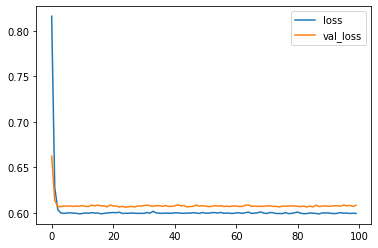

In [19]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

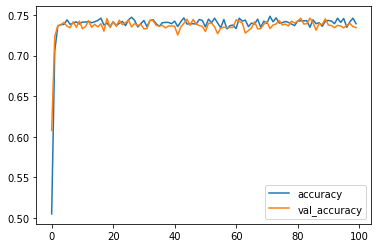

In [20]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### Simple RNN

In [24]:
inputs = np.expand_dims(X, -1)

# make RNN
_input = Input(shape=(T, D))
x = SimpleRNN(5)(_input)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 363us/sample - loss: 0.5967 - accuracy: 0.7264 - val_loss: 0.5896 - val_accuracy: 0.7432
Epoch 2/100
2500/2500 [==============================] - 0s 106us/sample - loss: 0.5732 - accuracy: 0.7452 - val_loss: 0.5623 - val_accuracy: 0.7508
Epoch 3/100
2500/2500 [==============================] - 0s 104us/sample - loss: 0.5353 - accuracy: 0.7520 - val_loss: 0.5028 - val_accuracy: 0.7456
Epoch 4/100
2500/2500 [==============================] - 0s 100us/sample - loss: 0.4771 - accuracy: 0.7732 - val_loss: 0.4491 - val_accuracy: 0.7708
Epoch 5/100
2500/2500 [==============================] - 0s 106us/sample - loss: 0.4367 - accuracy: 0.7756 - val_loss: 0.4201 - val_accuracy: 0.7716
Epoch 6/100
2500/2500 [==============================] - 0s 113us/sample - loss: 0.4107 - accuracy: 0.7848 - val_loss: 0.3894 - val_accuracy: 0.7948
Epoch 7/100
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 103us/sample - loss: 0.1012 - accuracy: 0.9684 - val_loss: 0.0939 - val_accuracy: 0.9712
Epoch 56/100
2500/2500 [==============================] - 0s 102us/sample - loss: 0.1021 - accuracy: 0.9660 - val_loss: 0.0962 - val_accuracy: 0.9684
Epoch 57/100
2500/2500 [==============================] - 0s 105us/sample - loss: 0.0978 - accuracy: 0.9668 - val_loss: 0.0886 - val_accuracy: 0.9752
Epoch 58/100
2500/2500 [==============================] - 0s 113us/sample - loss: 0.1017 - accuracy: 0.9616 - val_loss: 0.0904 - val_accuracy: 0.9728
Epoch 59/100
2500/2500 [==============================] - 0s 117us/sample - loss: 0.0960 - accuracy: 0.9680 - val_loss: 0.0888 - val_accuracy: 0.9768
Epoch 60/100
2500/2500 [==============================] - 0s 117us/sample - loss: 0.0952 - accuracy: 0.9680 - val_loss: 0.0892 - val_accuracy: 0.9712
Epoch 61/100
2500/2500 [==============================] - 0s 118us/sample - loss: 0.0926 - accuracy: 0.9676 - val

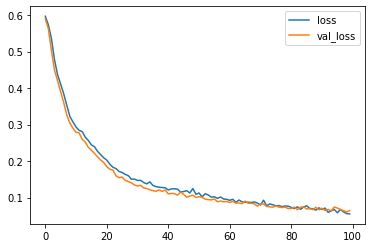

In [25]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

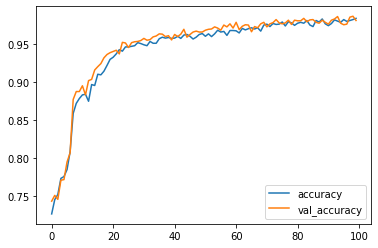

In [26]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

## LONG DISTANCE MODE

In [27]:
# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # short distance
    #y = get_label(x, -1, -2, -3)
    # long distance
    y = get_label(x, 0, 1, 2)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

### Simple RNN

In [28]:
inputs = np.expand_dims(X, -1)

# make RNN
_input = Input(shape=(T, D))
x = SimpleRNN(5)(_input)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 417us/sample - loss: 0.7040 - accuracy: 0.4916 - val_loss: 0.6933 - val_accuracy: 0.5184
Epoch 2/100
2500/2500 [==============================] - 0s 114us/sample - loss: 0.6773 - accuracy: 0.5592 - val_loss: 0.6354 - val_accuracy: 0.6584
Epoch 3/100
2500/2500 [==============================] - 0s 126us/sample - loss: 0.5964 - accuracy: 0.7008 - val_loss: 0.6176 - val_accuracy: 0.6484
Epoch 4/100
2500/2500 [==============================] - 0s 123us/sample - loss: 0.5929 - accuracy: 0.7088 - val_loss: 0.5639 - val_accuracy: 0.7260
Epoch 5/100
2500/2500 [==============================] - 0s 114us/sample - loss: 0.5500 - accuracy: 0.7396 - val_loss: 0.5508 - val_accuracy: 0.7296
Epoch 6/100
2500/2500 [==============================] - 0s 115us/sample - loss: 0.5257 - accuracy: 0.7516 - val_loss: 0.6061 - val_accuracy: 0.6792
Epoch 7/100
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 108us/sample - loss: 0.3474 - accuracy: 0.8196 - val_loss: 0.3433 - val_accuracy: 0.8084
Epoch 56/100
2500/2500 [==============================] - 0s 101us/sample - loss: 0.3045 - accuracy: 0.8436 - val_loss: 0.2860 - val_accuracy: 0.8516
Epoch 57/100
2500/2500 [==============================] - 0s 102us/sample - loss: 0.3605 - accuracy: 0.8448 - val_loss: 0.3875 - val_accuracy: 0.8256
Epoch 58/100
2500/2500 [==============================] - 0s 103us/sample - loss: 0.4007 - accuracy: 0.8216 - val_loss: 0.3893 - val_accuracy: 0.8436
Epoch 59/100
2500/2500 [==============================] - 0s 104us/sample - loss: 0.3517 - accuracy: 0.8576 - val_loss: 0.3538 - val_accuracy: 0.8468
Epoch 60/100
2500/2500 [==============================] - 0s 102us/sample - loss: 0.3325 - accuracy: 0.8532 - val_loss: 0.3611 - val_accuracy: 0.8324
Epoch 61/100
2500/2500 [==============================] - 0s 101us/sample - loss: 0.3016 - accuracy: 0.8600 - val

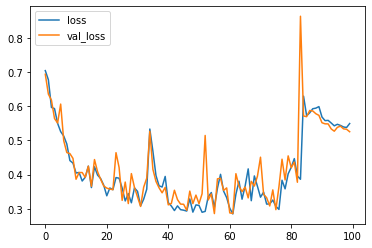

In [29]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

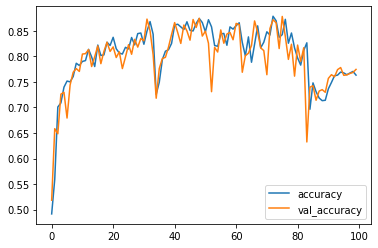

In [30]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### LSTM 

In [31]:
inputs = np.expand_dims(X, -1)

# make LSTM
_input = Input(shape=(T, D))
x = LSTM(5)(_input)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 2s 771us/sample - loss: 0.6889 - accuracy: 0.5396 - val_loss: 0.6753 - val_accuracy: 0.5708
Epoch 2/100
2500/2500 [==============================] - 0s 163us/sample - loss: 0.6700 - accuracy: 0.5920 - val_loss: 0.6602 - val_accuracy: 0.6240
Epoch 3/100
2500/2500 [==============================] - 0s 164us/sample - loss: 0.6406 - accuracy: 0.6412 - val_loss: 0.6166 - val_accuracy: 0.6780
Epoch 4/100
2500/2500 [==============================] - 0s 166us/sample - loss: 0.6321 - accuracy: 0.6596 - val_loss: 0.6152 - val_accuracy: 0.6644
Epoch 5/100
2500/2500 [==============================] - 0s 170us/sample - loss: 0.6079 - accuracy: 0.6788 - val_loss: 0.5908 - val_accuracy: 0.7112
Epoch 6/100
2500/2500 [==============================] - 0s 175us/sample - loss: 0.5579 - accuracy: 0.7436 - val_loss: 0.5374 - val_accuracy: 0.7580
Epoch 7/100
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 172us/sample - loss: 0.0369 - accuracy: 0.9860 - val_loss: 0.0633 - val_accuracy: 0.9820
Epoch 56/100
2500/2500 [==============================] - 0s 170us/sample - loss: 0.0365 - accuracy: 0.9876 - val_loss: 0.0479 - val_accuracy: 0.9824
Epoch 57/100
2500/2500 [==============================] - 0s 172us/sample - loss: 0.0346 - accuracy: 0.9876 - val_loss: 0.0596 - val_accuracy: 0.9812
Epoch 58/100
2500/2500 [==============================] - 0s 167us/sample - loss: 0.0404 - accuracy: 0.9836 - val_loss: 0.0464 - val_accuracy: 0.9840
Epoch 59/100
2500/2500 [==============================] - 0s 171us/sample - loss: 0.0284 - accuracy: 0.9888 - val_loss: 0.0386 - val_accuracy: 0.9876
Epoch 60/100
2500/2500 [==============================] - 0s 176us/sample - loss: 0.0648 - accuracy: 0.9780 - val_loss: 0.0472 - val_accuracy: 0.9844
Epoch 61/100
2500/2500 [==============================] - 0s 174us/sample - loss: 0.0292 - accuracy: 0.9888 - val

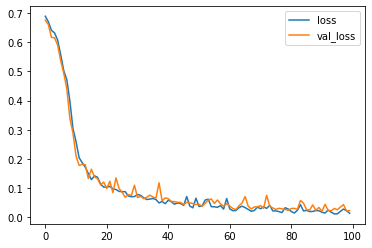

In [32]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

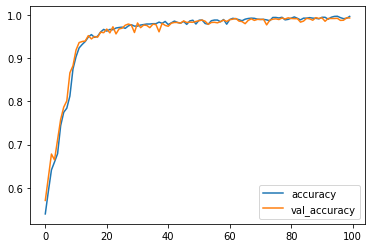

In [33]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### LSTM with Sequence length 20

In [34]:
# Start with a small T and increase it later
T = 20
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # short distance
    #y = get_label(x, -1, -2, -3)
    # long distance
    y = get_label(x, 0, 1, 2)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [35]:
inputs = np.expand_dims(X, -1)

# make LSTM
_input = Input(shape=(T, D))
x = LSTM(5)(_input)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 2s 787us/sample - loss: 0.6953 - accuracy: 0.5080 - val_loss: 0.6938 - val_accuracy: 0.5072
Epoch 2/100
2500/2500 [==============================] - 1s 257us/sample - loss: 0.6922 - accuracy: 0.5136 - val_loss: 0.6923 - val_accuracy: 0.5216
Epoch 3/100
2500/2500 [==============================] - 1s 264us/sample - loss: 0.6848 - accuracy: 0.5604 - val_loss: 0.6860 - val_accuracy: 0.5676
Epoch 4/100
2500/2500 [==============================] - 1s 259us/sample - loss: 0.6856 - accuracy: 0.5544 - val_loss: 0.6953 - val_accuracy: 0.4784
Epoch 5/100
2500/2500 [==============================] - 1s 263us/sample - loss: 0.6941 - accuracy: 0.5096 - val_loss: 0.6950 - val_accuracy: 0.4968
Epoch 6/100
2500/2500 [==============================] - 1s 264us/sample - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6947 - val_accuracy: 0.5044
Epoch 7/100
2500/2500 [==============================] - 1

2500/2500 [==============================] - 1s 508us/sample - loss: 0.6134 - accuracy: 0.6708 - val_loss: 0.6219 - val_accuracy: 0.6676
Epoch 56/100
2500/2500 [==============================] - 1s 503us/sample - loss: 0.6127 - accuracy: 0.6704 - val_loss: 0.6226 - val_accuracy: 0.6676
Epoch 57/100
2500/2500 [==============================] - 1s 504us/sample - loss: 0.6126 - accuracy: 0.6704 - val_loss: 0.6222 - val_accuracy: 0.6672
Epoch 58/100
2500/2500 [==============================] - 1s 502us/sample - loss: 0.6133 - accuracy: 0.6704 - val_loss: 0.6224 - val_accuracy: 0.6676
Epoch 59/100
2500/2500 [==============================] - 1s 509us/sample - loss: 0.6133 - accuracy: 0.6712 - val_loss: 0.6232 - val_accuracy: 0.6676
Epoch 60/100
2500/2500 [==============================] - 1s 511us/sample - loss: 0.6132 - accuracy: 0.6704 - val_loss: 0.6223 - val_accuracy: 0.6688
Epoch 61/100
2500/2500 [==============================] - 1s 501us/sample - loss: 0.6133 - accuracy: 0.6708 - val

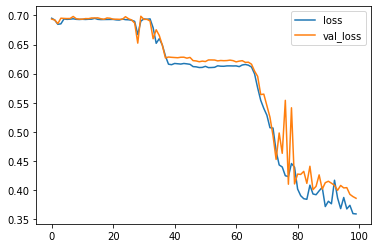

In [36]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

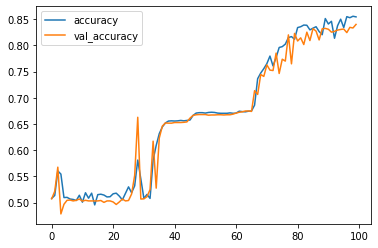

In [37]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### GRU with Sequence length 20

In [38]:
inputs = np.expand_dims(X, -1)

# make LSTM
_input = Input(shape=(T, D))
x = GRU(5)(_input)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6955 - accuracy: 0.5112 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/100
2500/2500 [==============================] - 1s 596us/sample - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6945 - val_accuracy: 0.4932
Epoch 3/100
2500/2500 [==============================] - 2s 600us/sample - loss: 0.6937 - accuracy: 0.5212 - val_loss: 0.6924 - val_accuracy: 0.5160
Epoch 4/100
2500/2500 [==============================] - 1s 595us/sample - loss: 0.6924 - accuracy: 0.5272 - val_loss: 0.6936 - val_accuracy: 0.5084
Epoch 5/100
2500/2500 [==============================] - 2s 601us/sample - loss: 0.6922 - accuracy: 0.5156 - val_loss: 0.6960 - val_accuracy: 0.4956
Epoch 6/100
2500/2500 [==============================] - 2s 645us/sample - loss: 0.6927 - accuracy: 0.5076 - val_loss: 0.6948 - val_accuracy: 0.5024
Epoch 7/100
2500/2500 [==============================] - 2s 

2500/2500 [==============================] - 2s 617us/sample - loss: 0.6692 - accuracy: 0.5864 - val_loss: 0.7225 - val_accuracy: 0.5024
Epoch 56/100
2500/2500 [==============================] - 2s 622us/sample - loss: 0.6895 - accuracy: 0.5456 - val_loss: 0.7065 - val_accuracy: 0.5056
Epoch 57/100
2500/2500 [==============================] - 2s 625us/sample - loss: 0.6795 - accuracy: 0.5700 - val_loss: 0.7032 - val_accuracy: 0.4984
Epoch 58/100
2500/2500 [==============================] - 2s 619us/sample - loss: 0.6767 - accuracy: 0.5788 - val_loss: 0.7065 - val_accuracy: 0.5052
Epoch 59/100
2500/2500 [==============================] - 2s 619us/sample - loss: 0.6747 - accuracy: 0.5864 - val_loss: 0.7063 - val_accuracy: 0.5192
Epoch 60/100
2500/2500 [==============================] - 2s 619us/sample - loss: 0.6695 - accuracy: 0.5888 - val_loss: 0.7112 - val_accuracy: 0.5136
Epoch 61/100
2500/2500 [==============================] - 2s 616us/sample - loss: 0.6686 - accuracy: 0.5972 - val

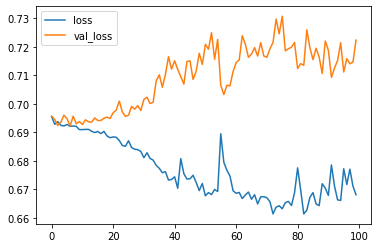

In [39]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

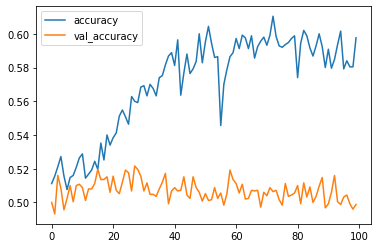

In [40]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### LSTM with Sequence length 30

In [41]:
# Start with a small T and increase it later
T = 30
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # short distance
    #y = get_label(x, -1, -2, -3)
    # long distance
    y = get_label(x, 0, 1, 2)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
inputs = np.expand_dims(X, -1)

# make LSTM
_input = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(_input)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6734 - accuracy: 0.5948 - val_loss: 0.6304 - val_accuracy: 0.6716
Epoch 2/100
2500/2500 [==============================] - 2s 731us/sample - loss: 0.5925 - accuracy: 0.6976 - val_loss: 0.5918 - val_accuracy: 0.7048
Epoch 3/100
2500/2500 [==============================] - 2s 769us/sample - loss: 0.5594 - accuracy: 0.7308 - val_loss: 0.5620 - val_accuracy: 0.7204
Epoch 4/100
2500/2500 [==============================] - 2s 782us/sample - loss: 0.5444 - accuracy: 0.7352 - val_loss: 0.5441 - val_accuracy: 0.7220
Epoch 5/100
2500/2500 [==============================] - 2s 783us/sample - loss: 0.5331 - accuracy: 0.7376 - val_loss: 0.5479 - val_accuracy: 0.7300
Epoch 6/100
2500/2500 [==============================] - 2s 764us/sample - loss: 0.5149 - accuracy: 0.7416 - val_loss: 0.5006 - val_accuracy: 0.7336
Epoch 7/100
2500/2500 [==============================] - 2s 

2500/2500 [==============================] - 2s 710us/sample - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.0234 - val_accuracy: 0.9912
Epoch 56/100
2500/2500 [==============================] - 2s 707us/sample - loss: 0.0209 - accuracy: 0.9920 - val_loss: 0.0258 - val_accuracy: 0.9896
Epoch 57/100
2500/2500 [==============================] - 2s 720us/sample - loss: 0.0205 - accuracy: 0.9948 - val_loss: 0.0232 - val_accuracy: 0.9924
Epoch 58/100
2500/2500 [==============================] - 2s 719us/sample - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0219 - val_accuracy: 0.9920
Epoch 59/100
2500/2500 [==============================] - 2s 702us/sample - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0220 - val_accuracy: 0.9916
Epoch 60/100
2500/2500 [==============================] - 2s 717us/sample - loss: 0.0177 - accuracy: 0.9956 - val_loss: 0.0208 - val_accuracy: 0.9924
Epoch 61/100
2500/2500 [==============================] - 43s 17ms/sample - loss: 0.0166 - accuracy: 0.9960 - val

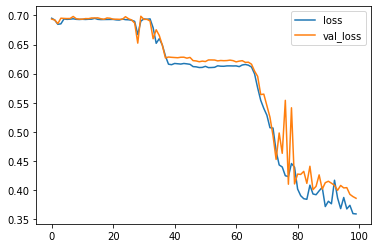

In [36]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

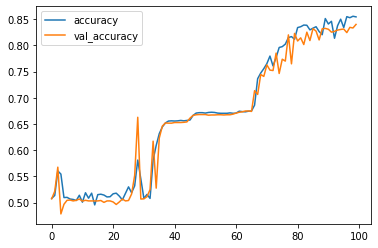

In [37]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();